In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/content/full_FEVS_prototype.csv')
df.head()

,Agency & Subagency Name,Sorting Code,Reporting Level_2015,Response Count_2015,Employee Engagement: Overall_2015,Employee Engagement: Leaders Lead_2015,Employee Engagement: Supervisors_2015,Employee Engagement: Intrinsic Work Experience_2015,HCAAF: Leadership and Knowledge Management_2015,HCAAF: Results-Oriented Performance Culture_2015,...,Employee Engagement: Intrinsic Work Experience_2020,Global Satisfaction_2020,Subsetting Code_2022,Reporting Level_2022,Response Count_2022,Employee Engagement: Overall_2022,Employee Engagement: Leaders Lead_2022,Employee Engagement: Supervisors_2022,Employee Engagement: Intrinsic Work Experience_2022,Global Satisfaction_2022
0,Governmentwide,GOV,Governmentwide,"421,748",0.64,0.51,0.71,0.69,0.59,0.52,...,0.755385,0.687276,GOV,Governmentwide,557778.0,0.705433,0.592260,0.797278,0.726760,0.616911
1,Department of Commerce,CM,Agency,"10,129",0.68,0.56,0.77,0.72,0.62,0.60,...,0.783147,0.737090,CM,Agency,21009.0,0.751025,0.647140,0.844430,0.761506,0.670687
2,National Oceanic and Atmospheric Administration,CM09,Level 1,"2,182",0.64,0.48,0.73,0.71,0.56,0.53,...,0.809156,0.766220,CM09,Level 1,4650.0,0.738390,0.614808,0.823755,0.776606,0.683583
3,"National Environmental Satellite, Data & Infor...",CM0901,Level 2,219,0.58,0.44,0.69,0.62,0.54,0.50,...,0.792685,0.717758,CM0901,Level 2,330.0,0.761881,0.658100,0.852604,0.774938,0.672584
4,NESDIS Headquarters & OSAAP,CM090101,Level 3,29,0.51,0.35,0.60,0.58,0.50,0.44,...,0.878258,0.833515,CM0901,Level 3,72.0,0.805889,0.771278,0.860474,0.785916,0.667937


# Functions


In [3]:
reporting_levels = ['Reporting Level_2015', 'Reporting Level_2016', 'Reporting Level_2017', 'Reporting Level_2018', 'Reporting Level_2019', 'Reporting Level_2020', 'Reporting Level_2022']

response_counts = ['Response Count_2015', 'Response Count_2016', 'Response Count_2017', 'Response Count_2018', 'Response Count_2019', 'Response Count_2020', 'Response Count_2022']

employee_engagement_overall = ['Employee Engagement: Overall_2015', 'Employee Engagement: Overall_2016', 'Employee Engagement: Overall_2017', 'Employee Engagement: Overall_2018', 'Employee Engagement: Overall_2019', 'Employee Engagement: Overall_2020', 'Employee Engagement: Overall_2022']

employee_engagement_leaders_lead = ['Employee Engagement: Leaders Lead_2015', 'Employee Engagement: Leaders Lead_2016', 'Employee Engagement: Leaders Lead_2017', 'Employee Engagement: Leaders Lead_2018', 'Employee Engagement: Leaders Lead_2019', 'Employee Engagement: Leaders Lead_2020', 'Employee Engagement: Leaders Lead_2022']

employee_engagement_supervisors = ['Employee Engagement: Supervisors_2015', 'Employee Engagement: Supervisors_2016', 'Employee Engagement: Supervisors_2017', 'Employee Engagement: Supervisors_2018', 'Employee Engagement: Supervisors_2019', 'Employee Engagement: Supervisors_2020', 'Employee Engagement: Supervisors_2022']

employee_engagement_intrinsic = ['Employee Engagement: Intrinsic Work Experience_2015', 'Employee Engagement: Intrinsic Work Experience_2016', 'Employee Engagement: Intrinsic Work Experience_2017', 'Employee Engagement: Intrinsic Work Experience_2018', 'Employee Engagement: Intrinsic Work Experience_2019', 'Employee Engagement: Intrinsic Work Experience_2020', 'Employee Engagement: Intrinsic Work Experience_2022']

new_iq_overall = ['New IQ: Overall_2015', 'New IQ: Overall_2016', 'New IQ: Overall_2017', 'New IQ: Overall_2018', 'New IQ: Overall_2019']

new_iq_fair = ['New IQ: Fair_2015', 'New IQ: Fair_2016', 'New IQ: Fair_2017', 'New IQ: Fair_2018', 'New IQ: Fair_2019']

new_iq_open = ['New IQ: Open_2015', 'New IQ: Open_2016', 'New IQ: Open_2017', 'New IQ: Open_2018', 'New IQ: Open_2019']

new_iq_cooperative = ['New IQ: Cooperative_2015', 'New IQ: Cooperative_2016', 'New IQ: Cooperative_2017', 'New IQ: Cooperative_2018', 'New IQ: Cooperative_2019']

new_iq_supportive = ['New IQ: Supportive_2015', 'New IQ: Supportive_2016', 'New IQ: Supportive_2017', 'New IQ: Supportive_2018', 'New IQ: Supportive_2019']

new_iq_empowered = ['New IQ: Empowered_2015', 'New IQ: Empowered_2016', 'New IQ: Empowered_2017', 'New IQ: Empowering_2018', 'New IQ: Empowering_2019']

global_satisfaction = ['Global Satisfaction_2015', 'Global Satisfaction_2016', 'Global Satisfaction_2017', 'Global Satisfaction_2018', 'Global Satisfaction_2019', 'Global Satisfaction_2020', 'Global Satisfaction_2022']

# 2D array for use in analysis functions
variables_list = [employee_engagement_leaders_lead, employee_engagement_supervisors, employee_engagement_intrinsic, new_iq_overall, new_iq_fair, new_iq_open, new_iq_cooperative, new_iq_supportive, new_iq_empowered, global_satisfaction ]




In [4]:

#Helper function to turn the variable name into string for naming in column
def var_name(variable):
    # Get the globals() dictionary
    global_vars = globals()

    # Iterate over the items in globals()
    for name, value in global_vars.items():
        if value is variable:
            return name


#Takes a list of columns, creates a series of means and barplots them
def barplot_select_column(df, selected_columns):
    column_means = df[selected_columns].mean(axis=0)

    # Create the bar plot
    column_means.plot(kind='bar')

    # Add labels and title
    plt.ylabel(f'Mean {var_name(selected_columns)}')
    plt.title(f'Mean {var_name(selected_columns)} Scores by Year')

    # Display the plot
    plt.show()



#Takes a series and return True if meets standards of normality, used a filter in the Anova Test Function
def test_normality(df):

        # Perform Shapiro-Wilk test for normality
        statistic, p_value = stats.shapiro(df)

        # Check the significance level to interpret the results
        alpha = 0.05
        if p_value > alpha:
           return True


#Takes a list of columns, creates a new dataframe from them, then preforms ANOVAs on each year compared to the next and prints the results
def anova_test(df, variables):
  variable_df = df[variables]
  #test the year of the variable
  print(var_name(variables).upper() + '\n')
  for year in variables:

    if (variables.index(year) != len(variables) - 1) and test_normality(variable_df[year]) and  test_normality(variable_df[variables[variables.index(year)+1]]):
        f_statistic, p_value = stats.f_oneway(variable_df[year], variable_df[variables[variables.index(year)+1]])

        #Print the results
        print(year + ' against ' + variable_df[variables[variables.index(year)+1]].name)
        print("F-statistic:", f_statistic)
        print("p-value:", p_value)
        print('\n')
        if p_value < 0.05:
            print("The p-value is less than 0.05, indicating a significant difference between the groups.")
        else:
            print("The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.")
        print('\n')


        print('---------------------------------------------------------------')



#Takes dataframe as input and creates heatmaps of variables for each year
def heatmap_years(df):
    years = ['2015', '2016', '2017', '2018', '2019', '2020', '2022']
    year_dfs = []

    for year in years:
        year_df = pd.DataFrame()  # Create a DataFrame for the column
        for column in df.columns:
            if year in column and (df[column].dtype != 'object'):
                year_df.insert(loc=len(year_df.columns), column=column, value=df[column])
        year_dfs.append(year_df)  # Store the year and DataFrame tuple

    # Create and display the heatmaps
    for heatmap_df, year in zip(year_dfs, years):
        # Compute the correlation matrix
        corr_matrix = heatmap_df.corr()

        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
        # Create a heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)
        plt.title(f'Variable Comparison Heatmap {year}')
        plt.show()

        #sort by correlation strength and show the list of strongest correlations
        sorted_corr_matrix = corr_matrix.reindex(corr_matrix.abs().sum().sort_values(ascending=False).index, axis=0)
        top_correlated_variables = sorted_corr_matrix.columns[:]
        # Print the results
        i = 1
        print(f"The sorted correlated variables are:")
        for variable in reversed(top_correlated_variables):
          print(f'{i}. ' + variable)
          i = i + 1

# Initial Insights from Barplotting Mean Scores by Year

- There seems to be a shared trend of increasing scores that tapers off and possibly lowers after 2020
- Scores may be positively correlated to eachother since they are increasing together


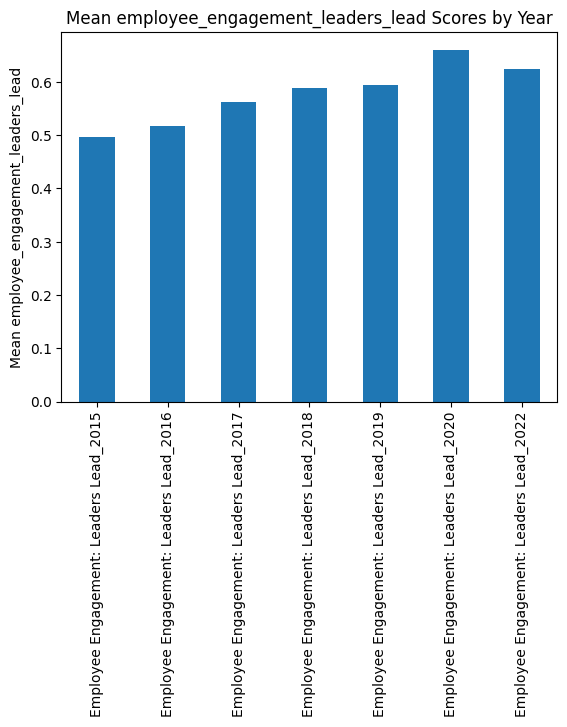

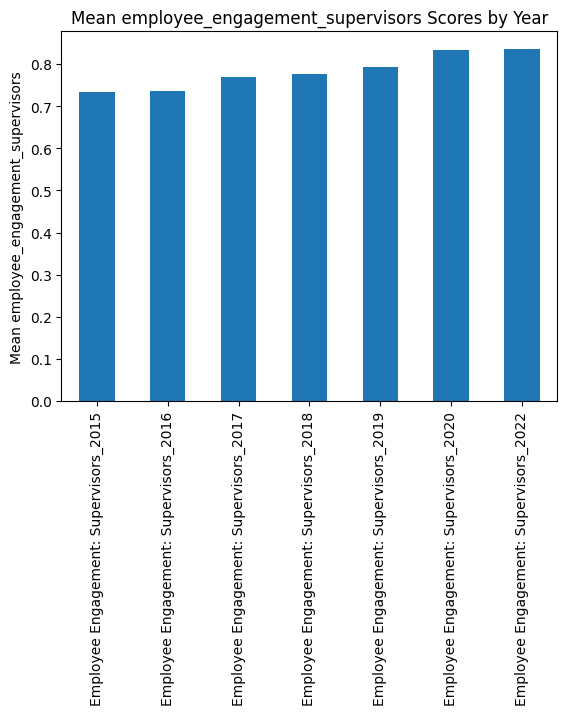

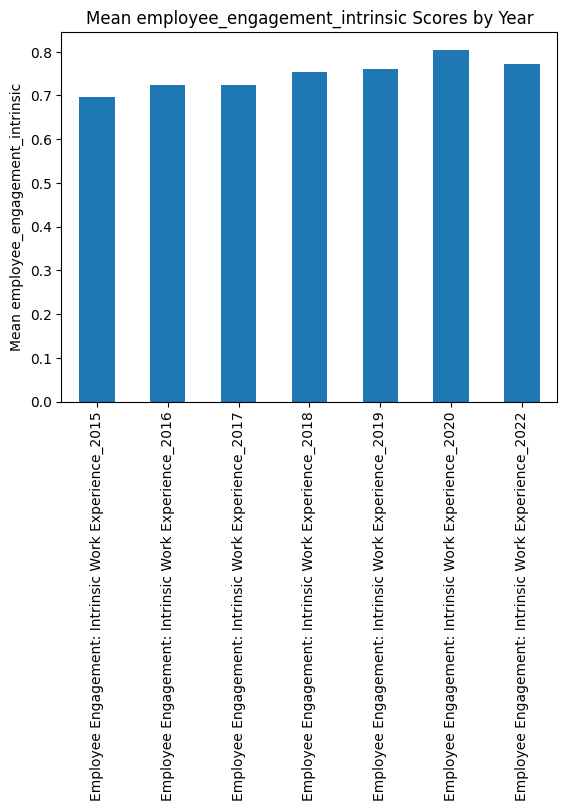

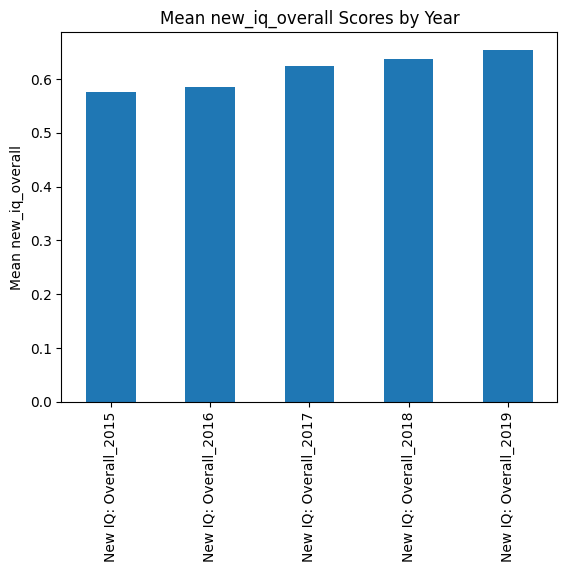

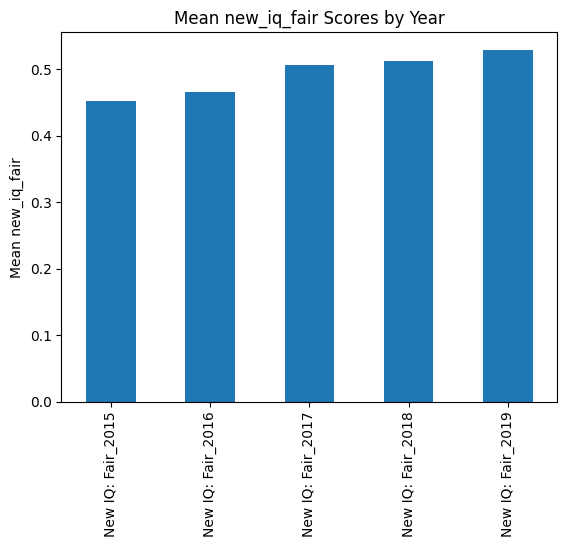

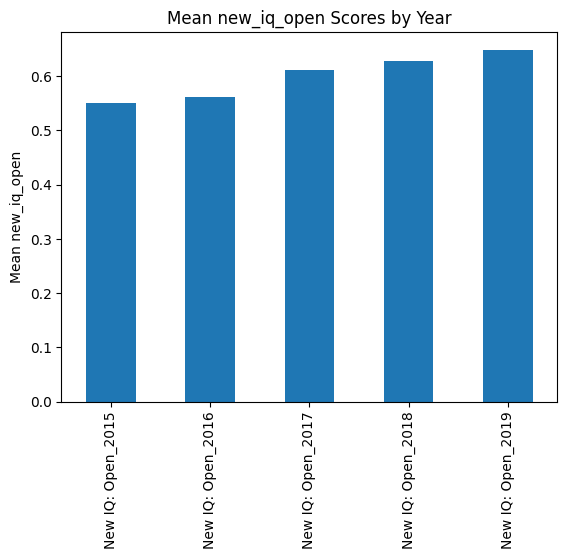

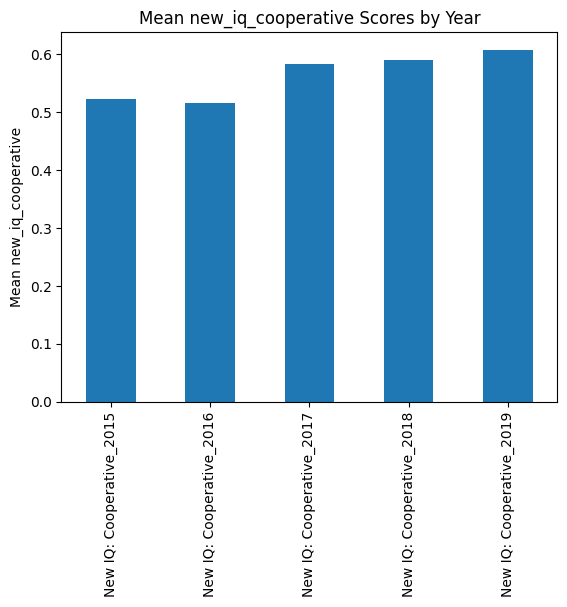

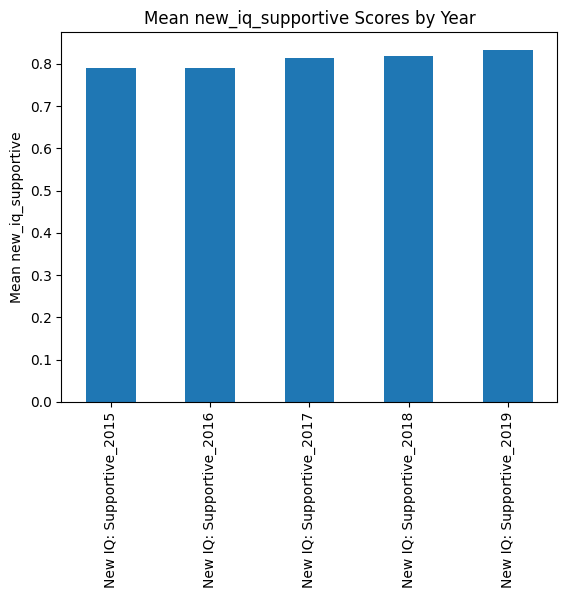

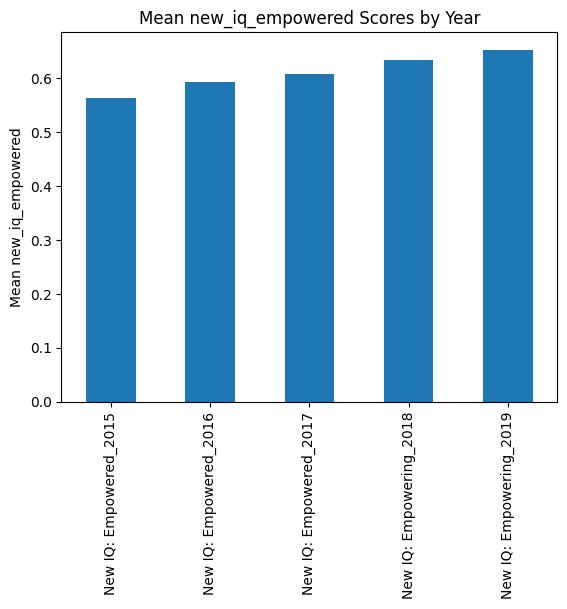

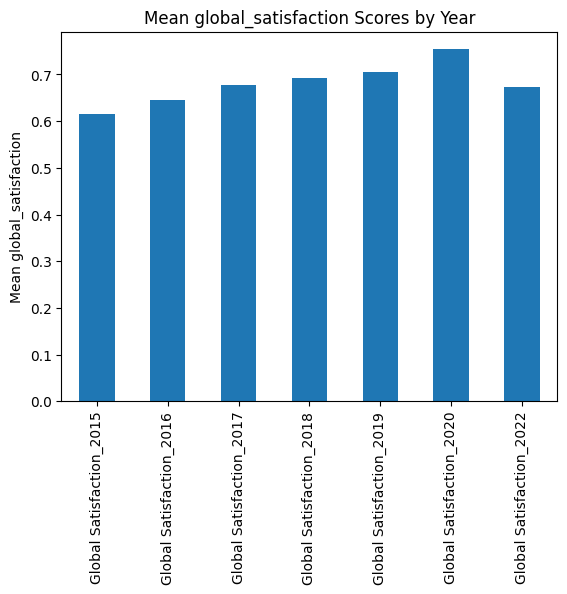

In [5]:
# iterates over each list of variables and preforms barplotting on the years for it
for variable in variables_list:
  barplot_select_column(df,variable)

# Analysis of Trends



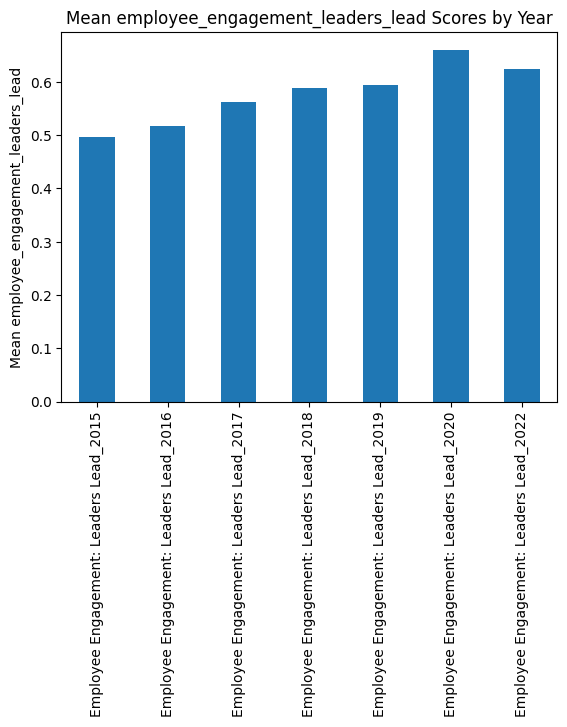

EMPLOYEE_ENGAGEMENT_LEADERS_LEAD

Employee Engagement: Leaders Lead_2015 against Employee Engagement: Leaders Lead_2016
F-statistic: 0.7422392328744574
p-value: 0.39096534317241516


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


---------------------------------------------------------------
Employee Engagement: Leaders Lead_2016 against Employee Engagement: Leaders Lead_2017
F-statistic: 4.353754401773753
p-value: 0.03942118718114236


The p-value is less than 0.05, indicating a significant difference between the groups.


---------------------------------------------------------------
Employee Engagement: Leaders Lead_2017 against Employee Engagement: Leaders Lead_2018
F-statistic: 1.48918076308061
p-value: 0.22515739883110394


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


---------------------------------------------------------------
Employee Engagement: Leaders Le

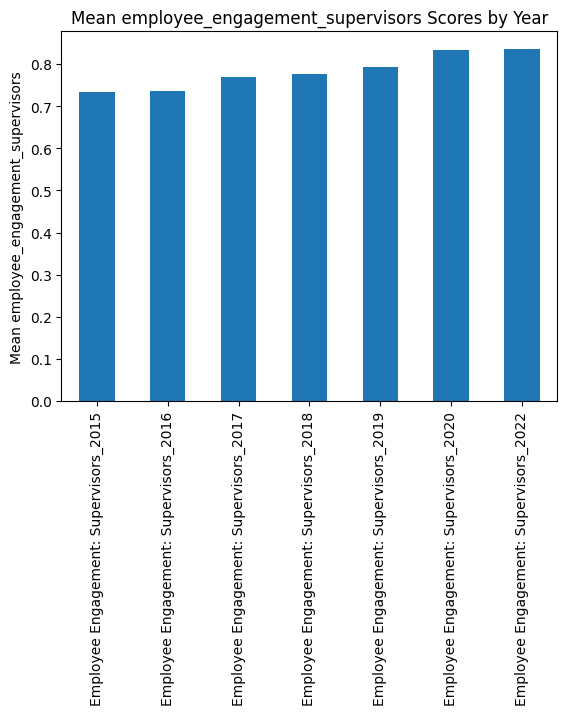

EMPLOYEE_ENGAGEMENT_SUPERVISORS

Employee Engagement: Supervisors_2015 against Employee Engagement: Supervisors_2016
F-statistic: 0.02967545807554842
p-value: 0.8635700171878009


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


---------------------------------------------------------------
Employee Engagement: Supervisors_2016 against Employee Engagement: Supervisors_2017
F-statistic: 5.054535549085809
p-value: 0.02671304747972365


The p-value is less than 0.05, indicating a significant difference between the groups.


---------------------------------------------------------------
Employee Engagement: Supervisors_2017 against Employee Engagement: Supervisors_2018
F-statistic: 0.3131565528312982
p-value: 0.5769764261031332


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


---------------------------------------------------------------
Employee Engagement: Supervisors_2018

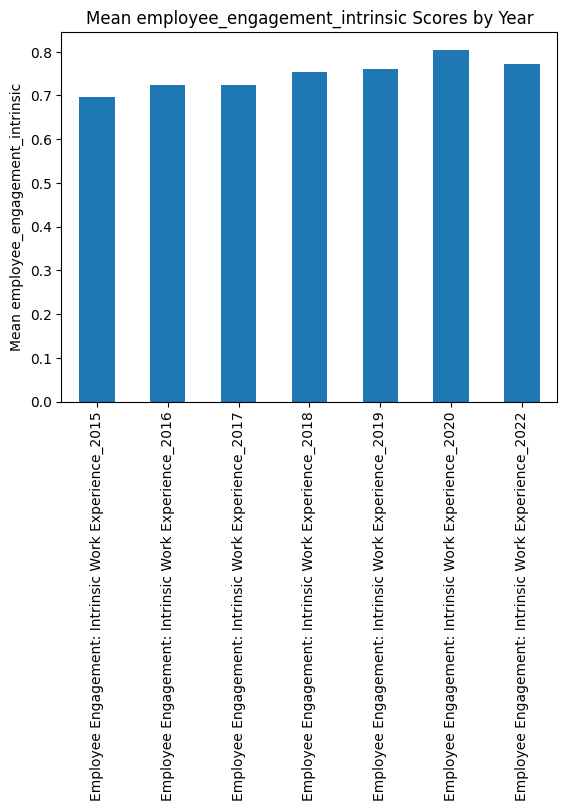

EMPLOYEE_ENGAGEMENT_INTRINSIC

Employee Engagement: Intrinsic Work Experience_2015 against Employee Engagement: Intrinsic Work Experience_2016
F-statistic: 3.9081322451656857
p-value: 0.050752360691533646


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


---------------------------------------------------------------
Employee Engagement: Intrinsic Work Experience_2016 against Employee Engagement: Intrinsic Work Experience_2017
F-statistic: 0.015961701190462495
p-value: 0.899711796043044


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


---------------------------------------------------------------
Employee Engagement: Intrinsic Work Experience_2017 against Employee Engagement: Intrinsic Work Experience_2018
F-statistic: 4.332831458360447
p-value: 0.03988773958290575


The p-value is less than 0.05, indicating a significant difference between the groups.


-----------------

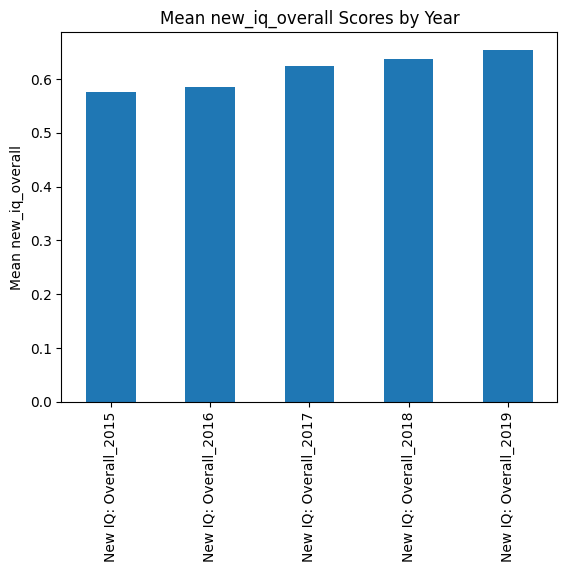

NEW_IQ_OVERALL

New IQ: Overall_2015 against New IQ: Overall_2016
F-statistic: 0.42442834556481146
p-value: 0.5162007851217767


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


---------------------------------------------------------------
New IQ: Overall_2016 against New IQ: Overall_2017
F-statistic: 9.439925457704804
p-value: 0.002722808639183264


The p-value is less than 0.05, indicating a significant difference between the groups.


---------------------------------------------------------------
New IQ: Overall_2017 against New IQ: Overall_2018
F-statistic: 0.8791758035594921
p-value: 0.3506424220469575


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


---------------------------------------------------------------
New IQ: Overall_2018 against New IQ: Overall_2019
F-statistic: 2.3845826451074816
p-value: 0.1256345982047376


The p-value is greater than or equal to 0.0

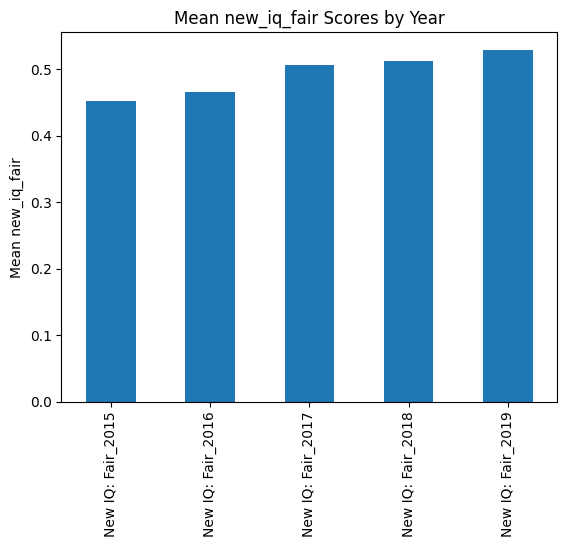

NEW_IQ_FAIR

New IQ: Fair_2015 against New IQ: Fair_2016
F-statistic: 0.7150992096422503
p-value: 0.3997355593411166


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


---------------------------------------------------------------
New IQ: Fair_2016 against New IQ: Fair_2017
F-statistic: 6.939042433568087
p-value: 0.009747044120878833


The p-value is less than 0.05, indicating a significant difference between the groups.


---------------------------------------------------------------
New IQ: Fair_2017 against New IQ: Fair_2018
F-statistic: 0.2116739098669219
p-value: 0.646437811132827


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


---------------------------------------------------------------
New IQ: Fair_2018 against New IQ: Fair_2019
F-statistic: 1.7974613814009763
p-value: 0.18299799216003837


The p-value is greater than or equal to 0.05, indicating no significant

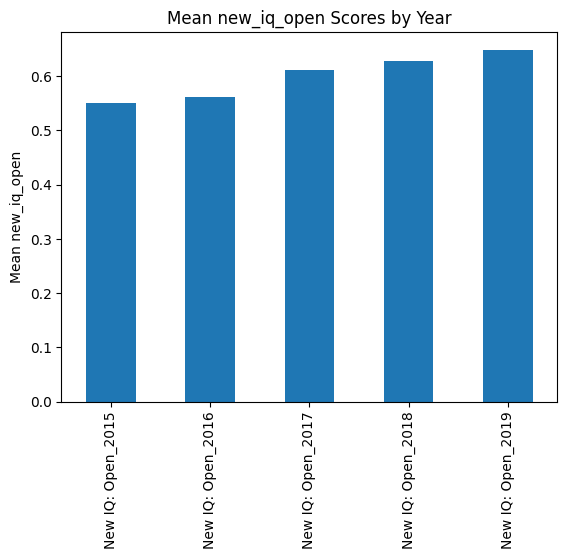

NEW_IQ_OPEN

New IQ: Open_2015 against New IQ: Open_2016
F-statistic: 0.5714093584796337
p-value: 0.4514416351903767


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


---------------------------------------------------------------
New IQ: Open_2016 against New IQ: Open_2017
F-statistic: 12.533129628894772
p-value: 0.0006039801855955991


The p-value is less than 0.05, indicating a significant difference between the groups.


---------------------------------------------------------------
New IQ: Open_2017 against New IQ: Open_2018
F-statistic: 1.4225803748295676
p-value: 0.23574634270908223


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


---------------------------------------------------------------
New IQ: Open_2018 against New IQ: Open_2019
F-statistic: 2.833130462535944
p-value: 0.09539666449780139


The p-value is greater than or equal to 0.05, indicating no signific

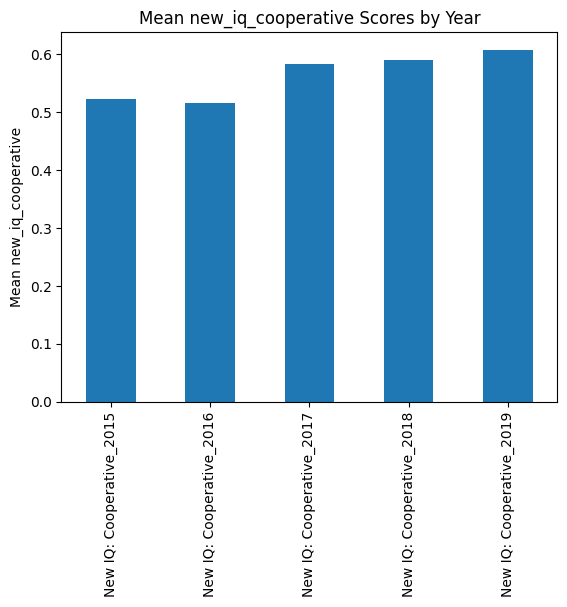

NEW_IQ_COOPERATIVE

New IQ: Cooperative_2015 against New IQ: Cooperative_2016
F-statistic: 0.10745885889123001
p-value: 0.7437278519490608


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


---------------------------------------------------------------
New IQ: Cooperative_2016 against New IQ: Cooperative_2017
F-statistic: 9.278579142412877
p-value: 0.0029511676719395905


The p-value is less than 0.05, indicating a significant difference between the groups.


---------------------------------------------------------------
New IQ: Cooperative_2017 against New IQ: Cooperative_2018
F-statistic: 0.14984840575559746
p-value: 0.6994867612415278


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


---------------------------------------------------------------
New IQ: Cooperative_2018 against New IQ: Cooperative_2019
F-statistic: 0.7743414240085342
p-value: 0.38094588985268807


The 

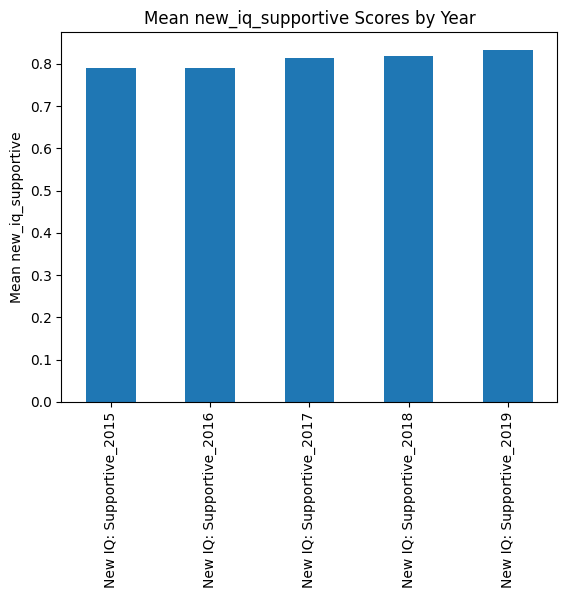

NEW_IQ_SUPPORTIVE

New IQ: Supportive_2015 against New IQ: Supportive_2016
F-statistic: 2.674561278806562e-32
p-value: 1.0


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


---------------------------------------------------------------
New IQ: Supportive_2016 against New IQ: Supportive_2017
F-statistic: 3.684019831335122
p-value: 0.057730730873218644


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


---------------------------------------------------------------
New IQ: Supportive_2017 against New IQ: Supportive_2018
F-statistic: 0.09535831470100839
p-value: 0.758102430194826


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


---------------------------------------------------------------
New IQ: Supportive_2018 against New IQ: Supportive_2019
F-statistic: 2.545258366154036
p-value: 0.11371969446206659


The p-value i

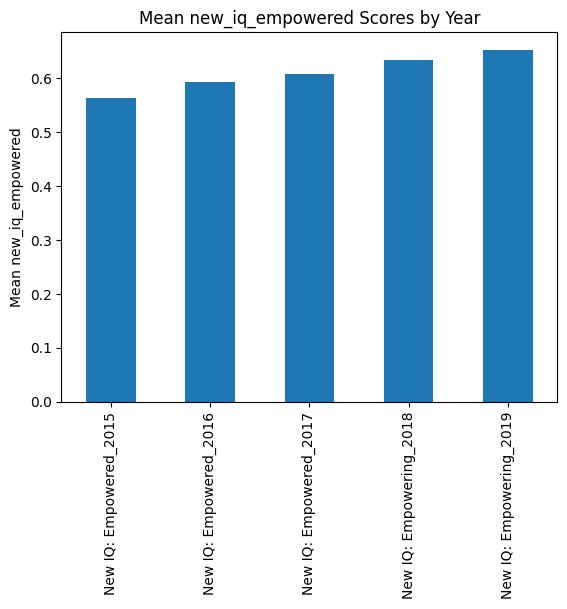

NEW_IQ_EMPOWERED

New IQ: Empowered_2015 against New IQ: Empowered_2016
F-statistic: 3.0296404877259433
p-value: 0.08477178852469054


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


---------------------------------------------------------------
New IQ: Empowering_2018 against New IQ: Empowering_2019
F-statistic: 1.6895329614621046
p-value: 0.19659236458911622


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


---------------------------------------------------------------


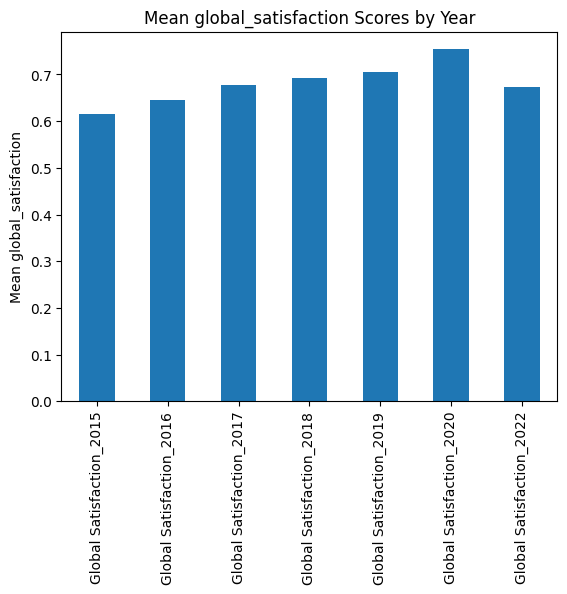

GLOBAL_SATISFACTION

Global Satisfaction_2015 against Global Satisfaction_2016
F-statistic: 2.029355252480302
p-value: 0.15733847147190427


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


---------------------------------------------------------------
Global Satisfaction_2018 against Global Satisfaction_2019
F-statistic: 0.6027777050716197
p-value: 0.4393168055479888


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


---------------------------------------------------------------
Global Satisfaction_2019 against Global Satisfaction_2020
F-statistic: 10.614688859597386
p-value: 0.001524336593871309


The p-value is less than 0.05, indicating a significant difference between the groups.


---------------------------------------------------------------
Global Satisfaction_2020 against Global Satisfaction_2022
F-statistic: 42.73417489458065
p-value: 2.5205509708950263e-09


The

In [6]:
'''
AVOVA Tests:

Hypothesis
- Null hypothesis (H₀): The average scores are the same across all years.
- Alternative hypothesis (H₁): The average scores are different across at least two years.

Data Organization
- Each year is represented by a separate column in the dataset, with the variables for each year recorded in the respective columns.

Assumption Checking
- ANOVA assumes independence of observations, which is met by nature of survey data and normality of the data within each group, which is checked by the test_normality() function

'''

for variable in variables_list:
  barplot_select_column(df,variable)
  anova_test(df, variable)


## ANOVA Insights
- There is a trend in the data that shows a subtle increase in survey scores from 2015 to 2018, which then tapers off in some variables until 2020, where there is a general increase in scores. After this there is a decrease in 2022.

- This is supported by ANOVAs preformed on each grouping of variables which indicates signifigant differences between years of increase/decrease and inidicates lack of signifigant differences in plateau years.

- The cause of this trend could be attributed to many factors, which could be explored via analysis of policy across government, specifically NOAA agencies.

- Policy or economic factors most likely influenced the trend of a rise in metrics.

- A possible factor in the decrease of scores could be attributed to COVID and compared against policies that were affected to guide ways to increase scores.


# Analysis of Correlations

Heatmaps visualize the correlation between variables. Darker colors represent stronger positive or negative correlations, while lighter colors indicate weaker or no correlations.

There are strong correlations between related variables and very weak correlations between response counts to the rest of the data, which indicates this is coherent data that makes sense on an intuitive level.

- For each year a heatmap has been created to show the strength of the correlations between variables
- Each heatmap also features a list the variables sorted in order of overall correlation to the other variables of the dataset, which is an indicator of their importance in the dataset

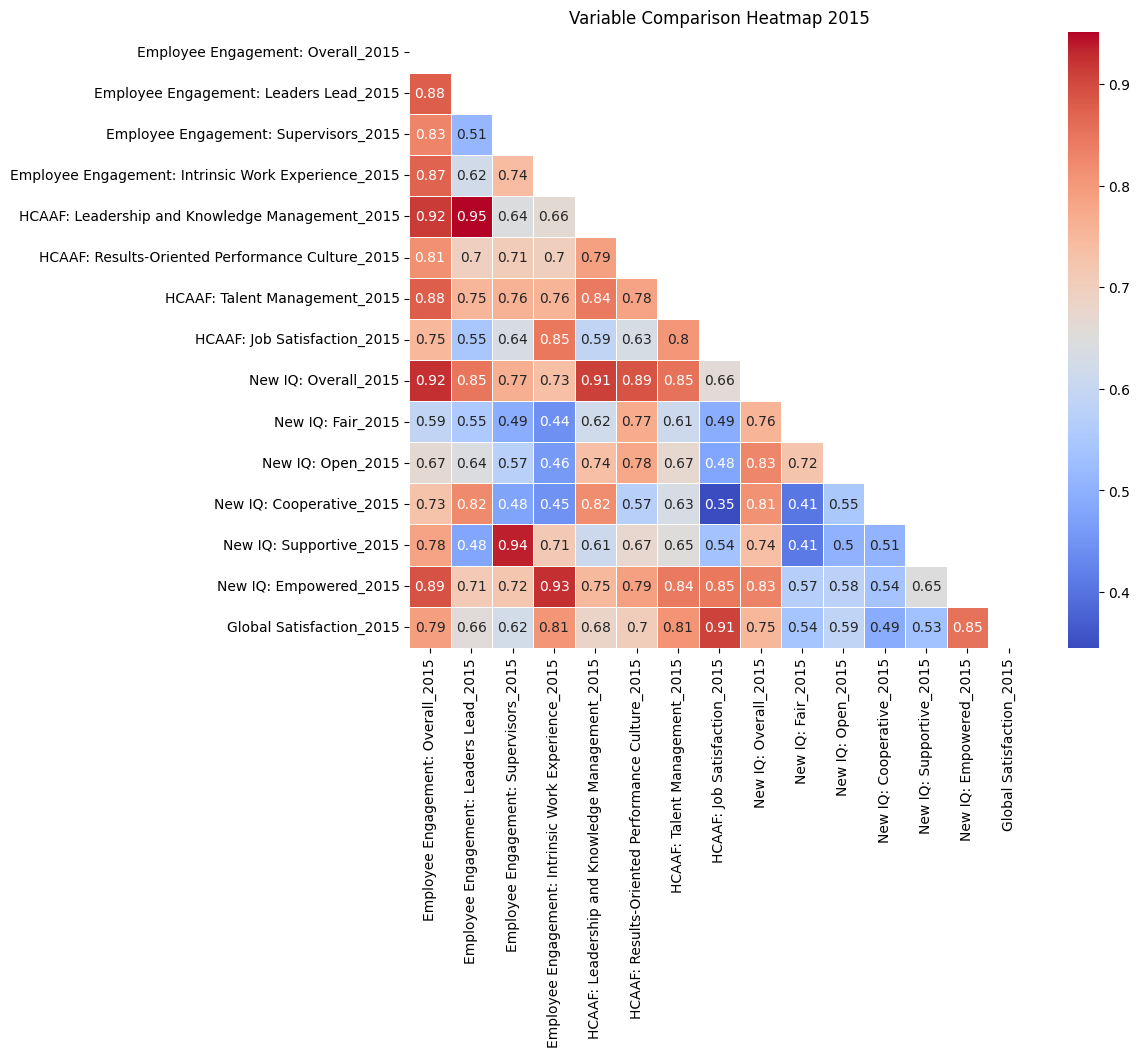

The sorted correlated variables are:
1. Global Satisfaction_2015
2. New IQ: Empowered_2015
3. New IQ: Supportive_2015
4. New IQ: Cooperative_2015
5. New IQ: Open_2015
6. New IQ: Fair_2015
7. New IQ: Overall_2015
8. HCAAF: Job Satisfaction_2015
9. HCAAF: Talent Management_2015
10. HCAAF: Results-Oriented Performance Culture_2015
11. HCAAF: Leadership and Knowledge Management_2015
12. Employee Engagement: Intrinsic Work Experience_2015
13. Employee Engagement: Supervisors_2015
14. Employee Engagement: Leaders Lead_2015
15. Employee Engagement: Overall_2015


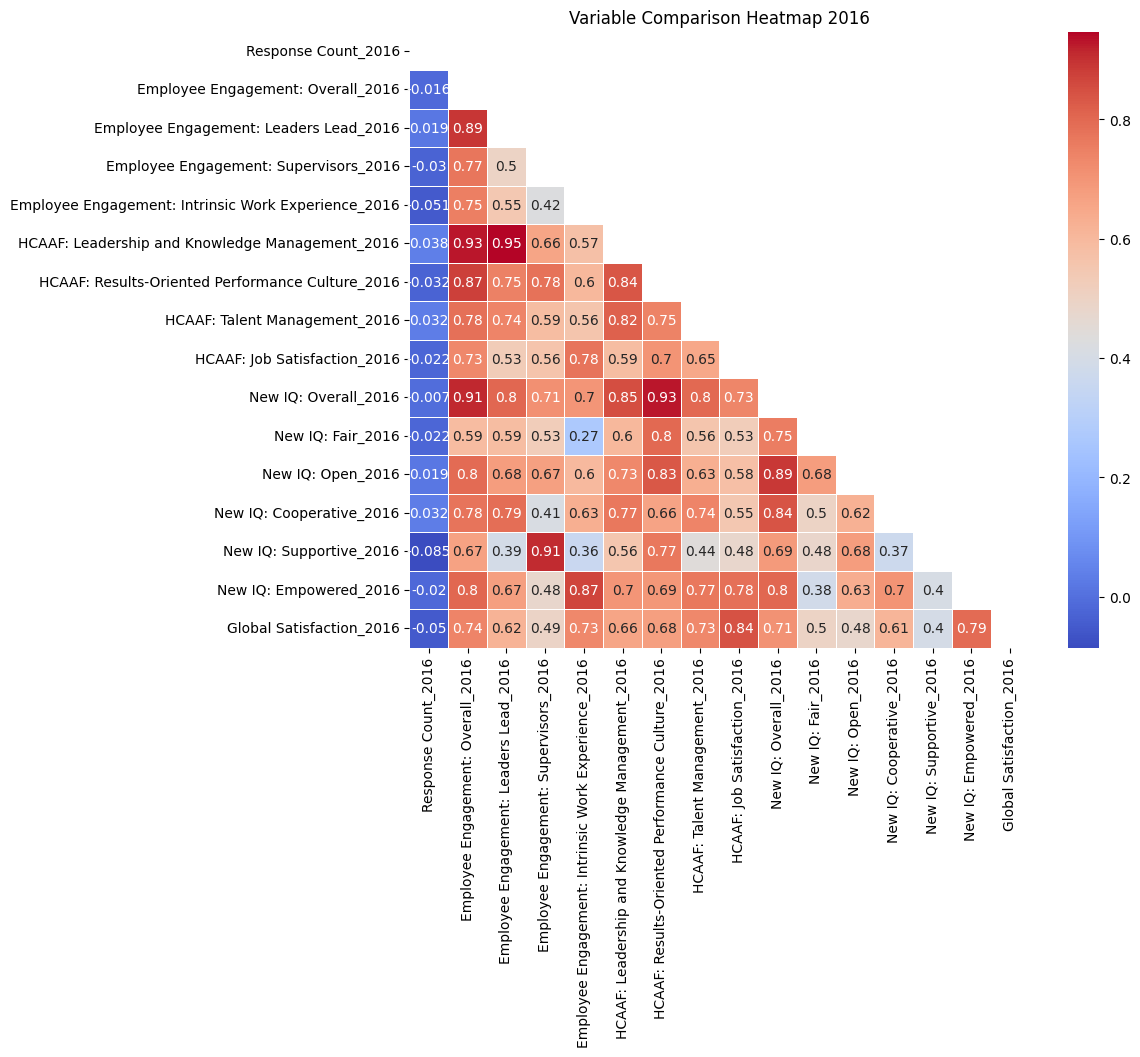

The sorted correlated variables are:
1. Global Satisfaction_2016
2. New IQ: Empowered_2016
3. New IQ: Supportive_2016
4. New IQ: Cooperative_2016
5. New IQ: Open_2016
6. New IQ: Fair_2016
7. New IQ: Overall_2016
8. HCAAF: Job Satisfaction_2016
9. HCAAF: Talent Management_2016
10. HCAAF: Results-Oriented Performance Culture_2016
11. HCAAF: Leadership and Knowledge Management_2016
12. Employee Engagement: Intrinsic Work Experience_2016
13. Employee Engagement: Supervisors_2016
14. Employee Engagement: Leaders Lead_2016
15. Employee Engagement: Overall_2016
16. Response Count_2016


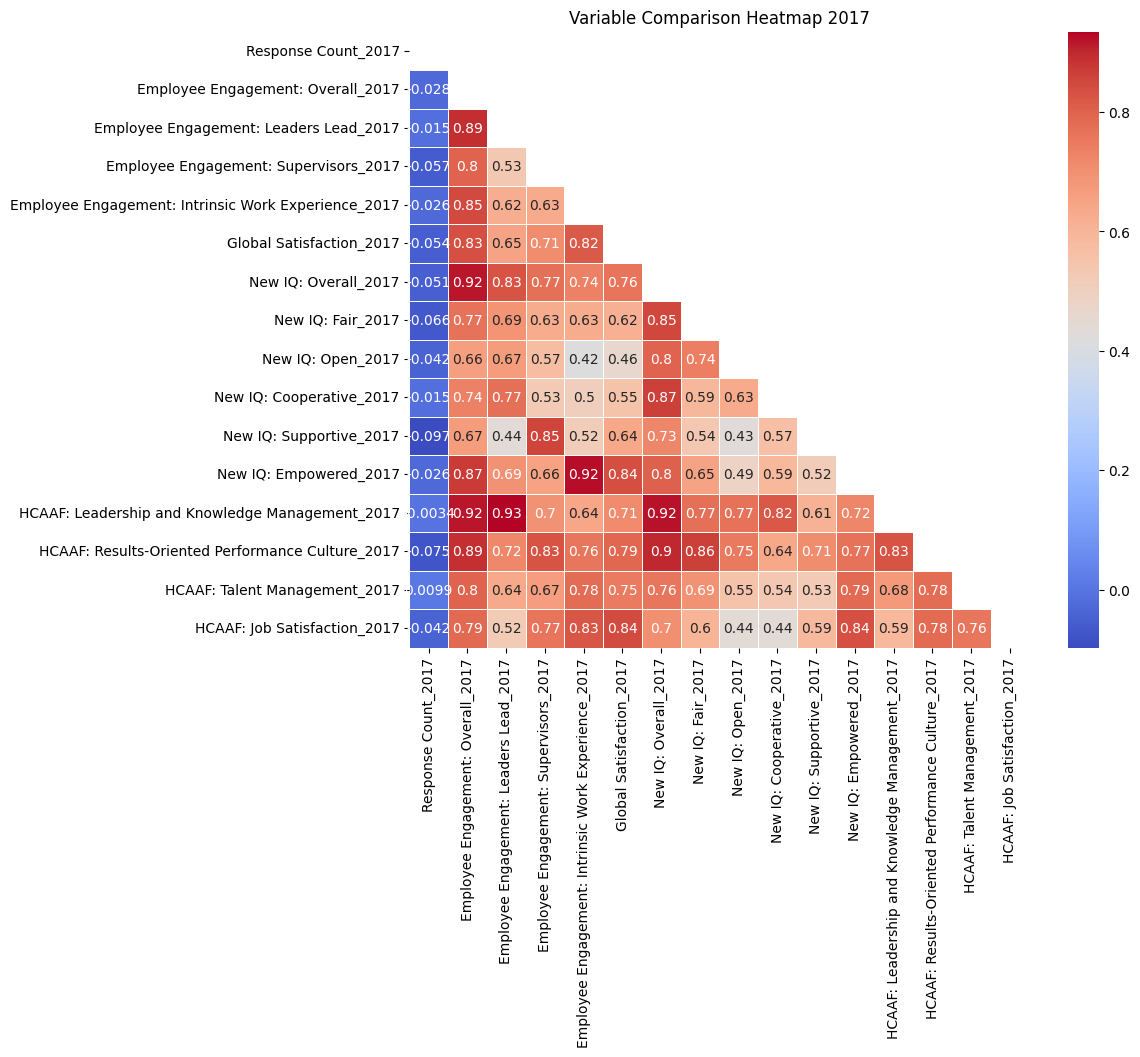

The sorted correlated variables are:
1. HCAAF: Job Satisfaction_2017
2. HCAAF: Talent Management_2017
3. HCAAF: Results-Oriented Performance Culture_2017
4. HCAAF: Leadership and Knowledge Management_2017
5. New IQ: Empowered_2017
6. New IQ: Supportive_2017
7. New IQ: Cooperative_2017
8. New IQ: Open_2017
9. New IQ: Fair_2017
10. New IQ: Overall_2017
11. Global Satisfaction_2017
12. Employee Engagement: Intrinsic Work Experience_2017
13. Employee Engagement: Supervisors_2017
14. Employee Engagement: Leaders Lead_2017
15. Employee Engagement: Overall_2017
16. Response Count_2017


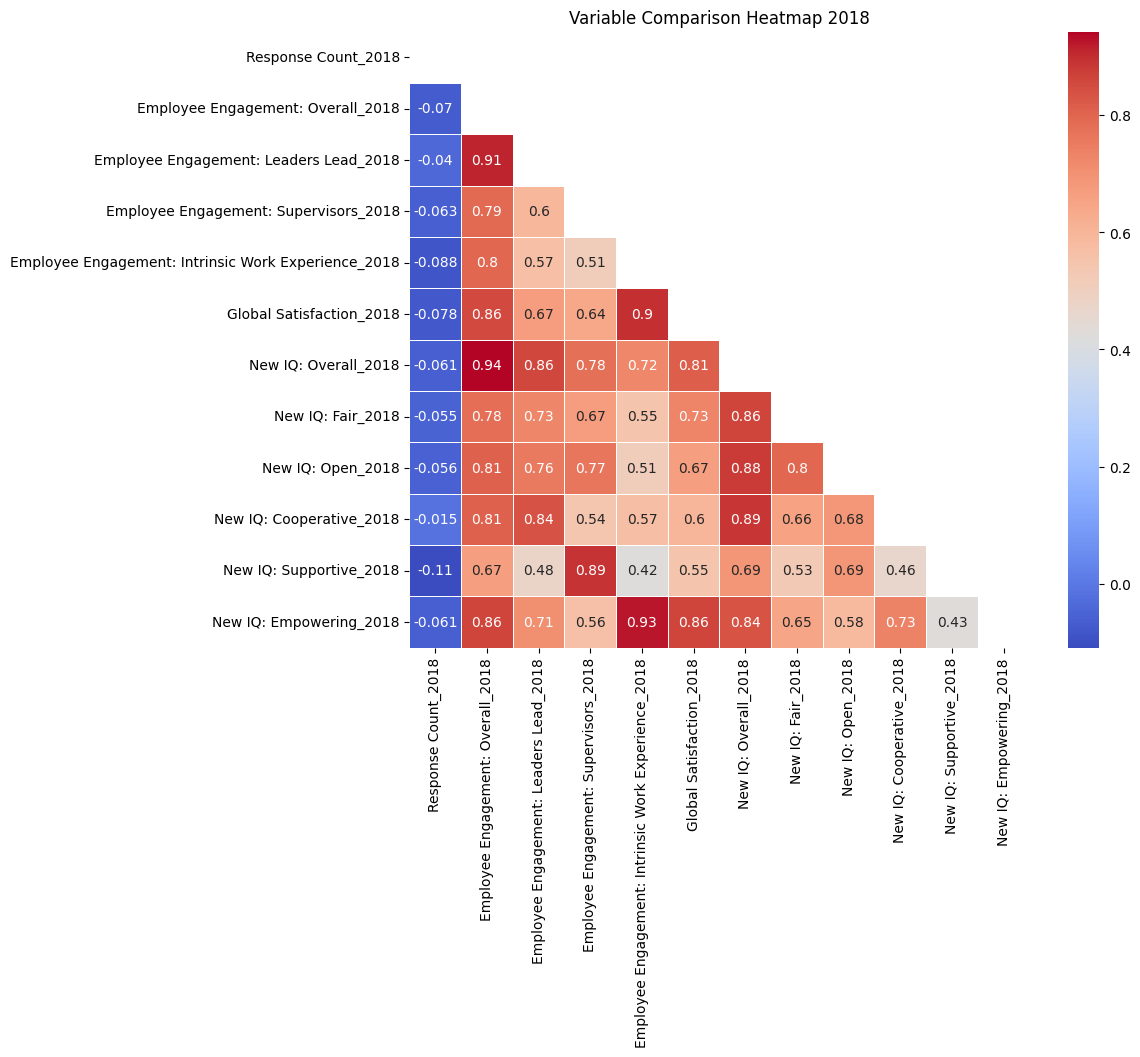

The sorted correlated variables are:
1. New IQ: Empowering_2018
2. New IQ: Supportive_2018
3. New IQ: Cooperative_2018
4. New IQ: Open_2018
5. New IQ: Fair_2018
6. New IQ: Overall_2018
7. Global Satisfaction_2018
8. Employee Engagement: Intrinsic Work Experience_2018
9. Employee Engagement: Supervisors_2018
10. Employee Engagement: Leaders Lead_2018
11. Employee Engagement: Overall_2018
12. Response Count_2018


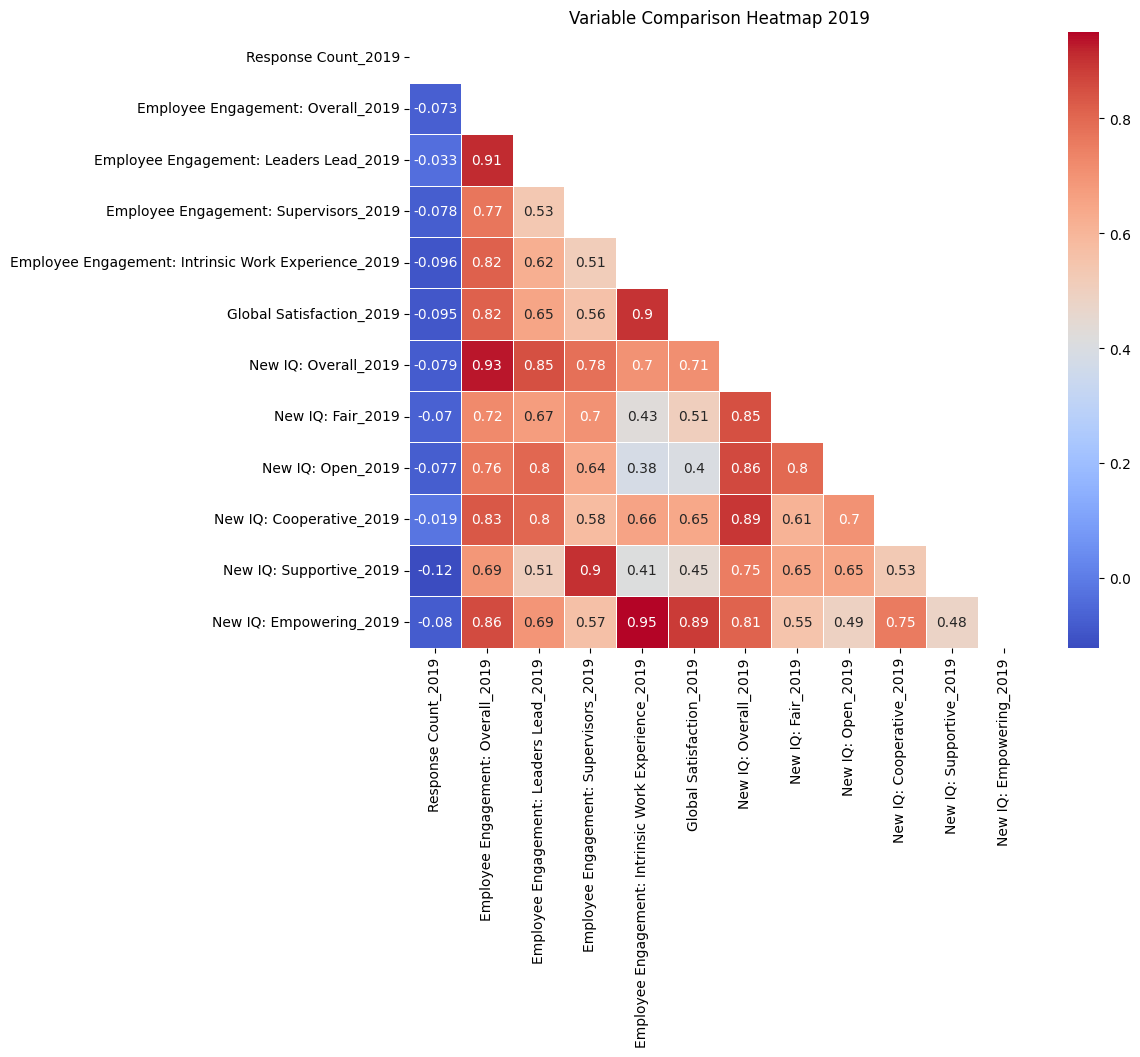

The sorted correlated variables are:
1. New IQ: Empowering_2019
2. New IQ: Supportive_2019
3. New IQ: Cooperative_2019
4. New IQ: Open_2019
5. New IQ: Fair_2019
6. New IQ: Overall_2019
7. Global Satisfaction_2019
8. Employee Engagement: Intrinsic Work Experience_2019
9. Employee Engagement: Supervisors_2019
10. Employee Engagement: Leaders Lead_2019
11. Employee Engagement: Overall_2019
12. Response Count_2019


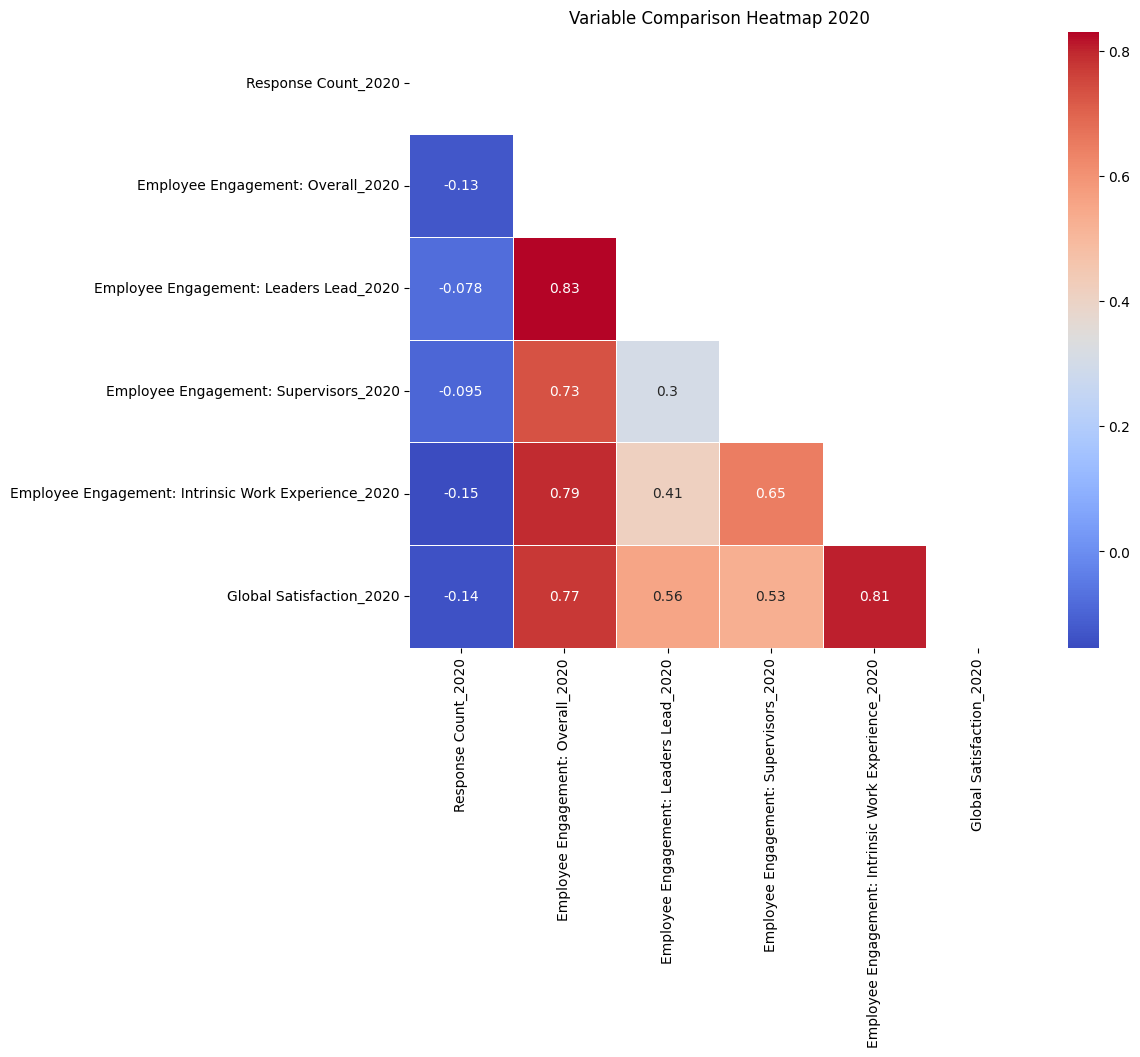

The sorted correlated variables are:
1. Global Satisfaction_2020
2. Employee Engagement: Intrinsic Work Experience_2020
3. Employee Engagement: Supervisors_2020
4. Employee Engagement: Leaders Lead_2020
5. Employee Engagement: Overall_2020
6. Response Count_2020


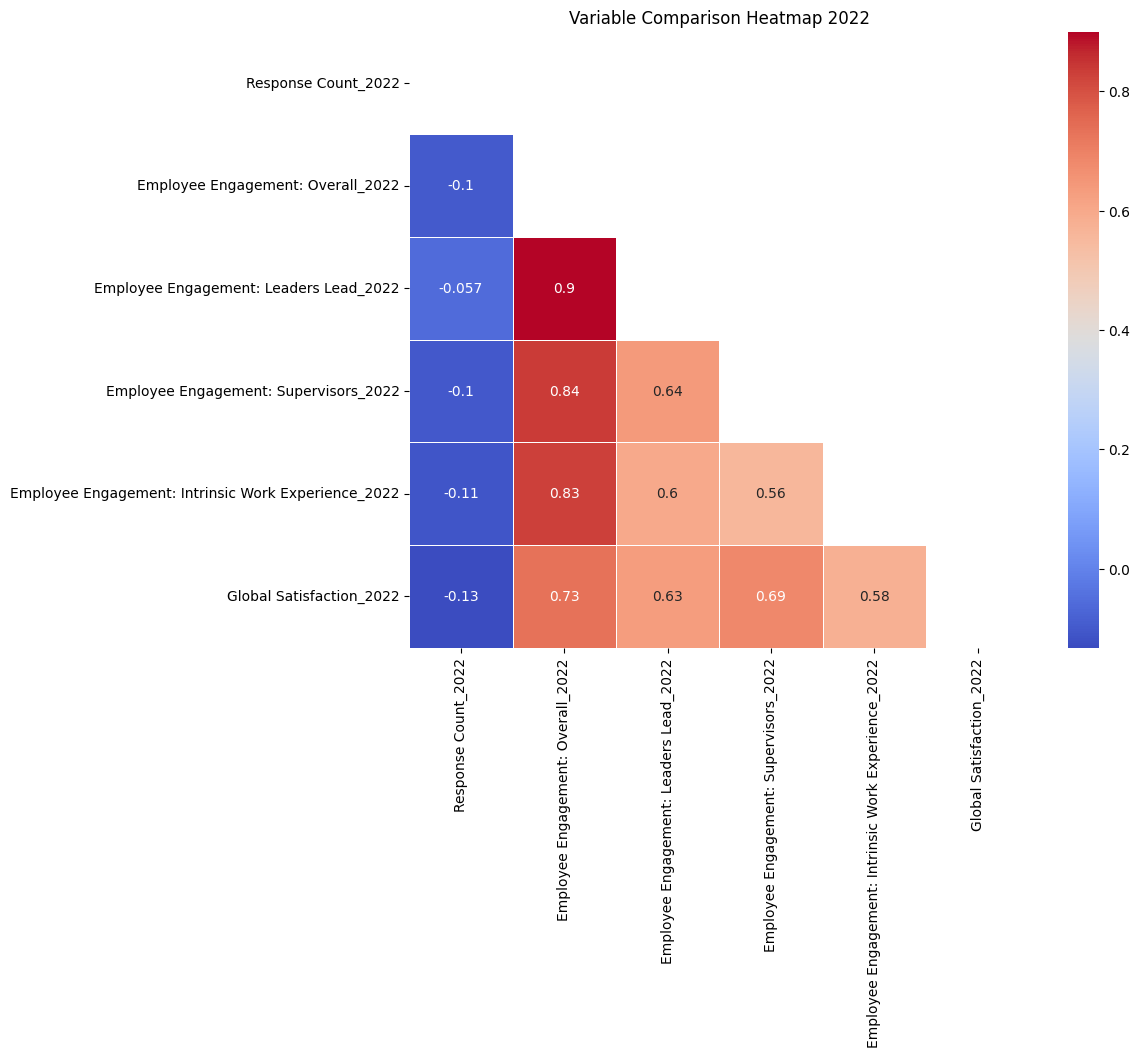

The sorted correlated variables are:
1. Global Satisfaction_2022
2. Employee Engagement: Intrinsic Work Experience_2022
3. Employee Engagement: Supervisors_2022
4. Employee Engagement: Leaders Lead_2022
5. Employee Engagement: Overall_2022
6. Response Count_2022


In [7]:
heatmap_years(df)

## Correlation Insights
- Employee Engagement: Intrinsic Work Experience and New IQ: Empowered were  high in importance compared to other similar metrics, shown by their strong positive correlation to the other variables. This is most likely due to their intrinsic meanings.

### Employee Engagement: Intrinsic Work Experience

Employee Engagement: Intrinsic Work Experience reflects the level of intrinsic motivation and satisfaction employees derive from their work.

- **Significance**: Intrinsic Work Experience plays a crucial role in shaping employee engagement levels and job satisfaction.
- **Impact**: When employees find their work meaningful, fulfilling, and aligned with their values, it positively influences their overall engagement, productivity, and job performance.
- **Strategies**: Organizations can enhance Intrinsic Work Experience by providing challenging and meaningful work assignments, promoting autonomy and decision-making authority, recognizing and leveraging employees' strengths, and offering opportunities for personal and professional growth.

### New IQ: Empowered

New IQ: Empowered measures the level of empowerment individuals perceive within the organization.

- **Importance**: Empowerment is a key aspect of fostering employee engagement and organizational success.
- **Impact**: When individuals feel empowered, they are more likely to take initiative, make decisions, and contribute effectively to the organization's goals.
- **Strategies**: Organizations can enhance empowerment by providing employees with autonomy, decision-making authority, clear communication channels, and opportunities for growth and development.

### What can we take away from this?
The importance of "Employee Engagement: Intrinsic Work Experience" and "New IQ: Empowered" variables in survey data signifies the importance of fostering a culture of personal fulfillment and empowerment among its employees.

Employees who perceive a high level of intrinsic work experience, finding their work meaningful and aligned with their values, are more likely to be engaged and satisfied in their roles. This makes sense as NOAA's mission is environmental conservation and scientific research. Tapping into employees' passion for protecting our oceans and atmosphere will increase sentiment towards work and increase porductivity.

Additionally, empowering employees by providing resources, support, and autonomy allows them to make informed decisions and drive innovation within the organization. This empowerment fosters a culture of collaboration, problem-solving, and continuous improvement, enabling NOAA to address complex environmental challenges effectively.
